In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime

In [2]:
# Load your dataset
data = pd.read_csv('flightPrice.csv')

In [3]:
# Convert 'Date_of_journey' to datetime format
data['Date_of_journey'] = pd.to_datetime(data['Date_of_journey'])

In [4]:
# Extract day and month from 'Date_of_journey' and drop original column
data['Journey_day'] = data['Date_of_journey'].dt.day
data['Journey_month'] = data['Date_of_journey'].dt.month
data.drop('Date_of_journey', axis=1, inplace=True)

In [5]:
#'features' contains independent variables and 'target' contains dependent variable
features = data[['Journey_day', 'Journey_month', 'Airline', 'Flight_code', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination', 'Duration_in_hours', 'Days_left']]
target = data['Fare']

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [7]:
# Define categorical and numerical features
categorical_features = ['Airline', 'Flight_code', 'Class', 'Source', 'Departure', 'Arrival', 'Destination', 'Total_stops']
numerical_features = ['Journey_day', 'Journey_month',  'Duration_in_hours', 'Days_left']

In [8]:
# Define preprocessing steps for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [9]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [10]:
# Create a Linear Regression model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())
                       ])

In [11]:
# Train the model using training sets
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Journey_day',
                                                   'Journey_month',
                                                   'Duration_in_hours',
                                                   'Days_left']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Airline', 'Flight_code',
                                                   'Class', 'Source',
                                                   'Departure', 'Arrival',
                                                   'Destination',
                                                   'Total_stops'])])),
                ('regressor', LinearRegression())])

In [12]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [13]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 50446206.316866204
Root Mean Squared Error: 7102.549282959338
Mean Absolute Error: 4698.814722308661


In [14]:
print("Coefficients:", model.named_steps['regressor'].coef_)
print("Intercept:", model.named_steps['regressor'].intercept_)

Coefficients: [ 8725.06718203 17639.03165458   -94.83988465 ...  2003.54880533
  5894.30338126 -7897.85208646]
Intercept: 35057.78979835953


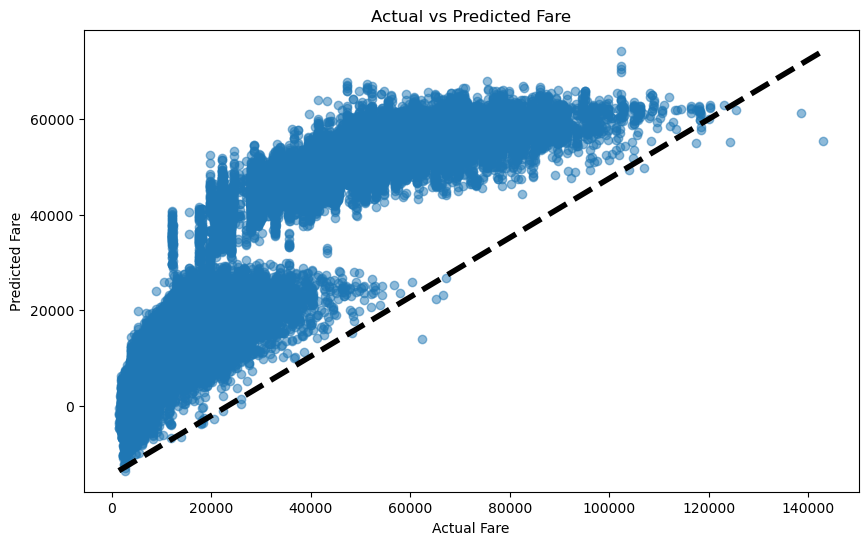

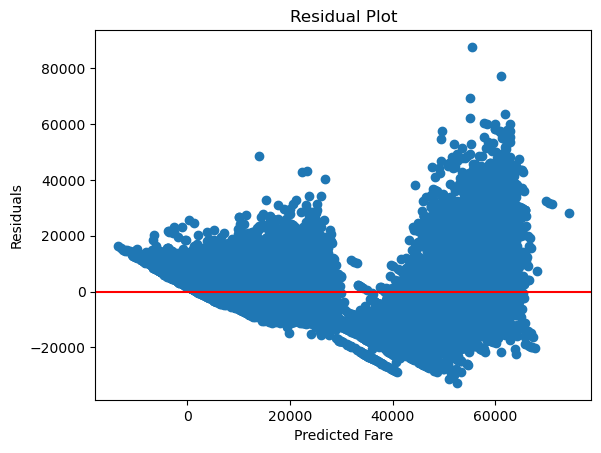

In [15]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10,6), facecolor='white')
plt.scatter(y_test, predictions,alpha=0.5)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted Fare")
plt.plot([y_test.min(),y_test.max()],[predictions.min(),predictions.max()],'k--', lw=4)
plt.show()

# Plot residuals
residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.show()

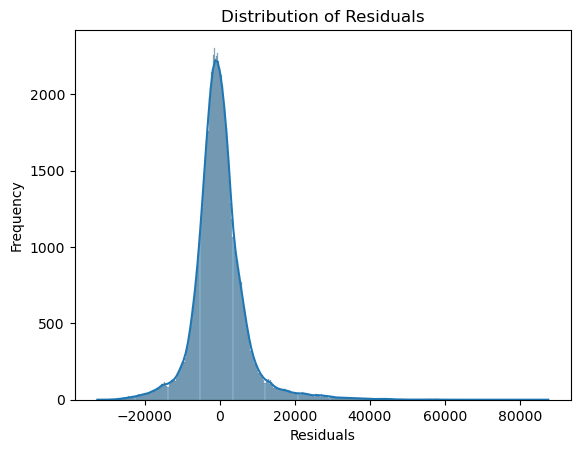

In [16]:
import seaborn as sns

# Plot distribution of residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

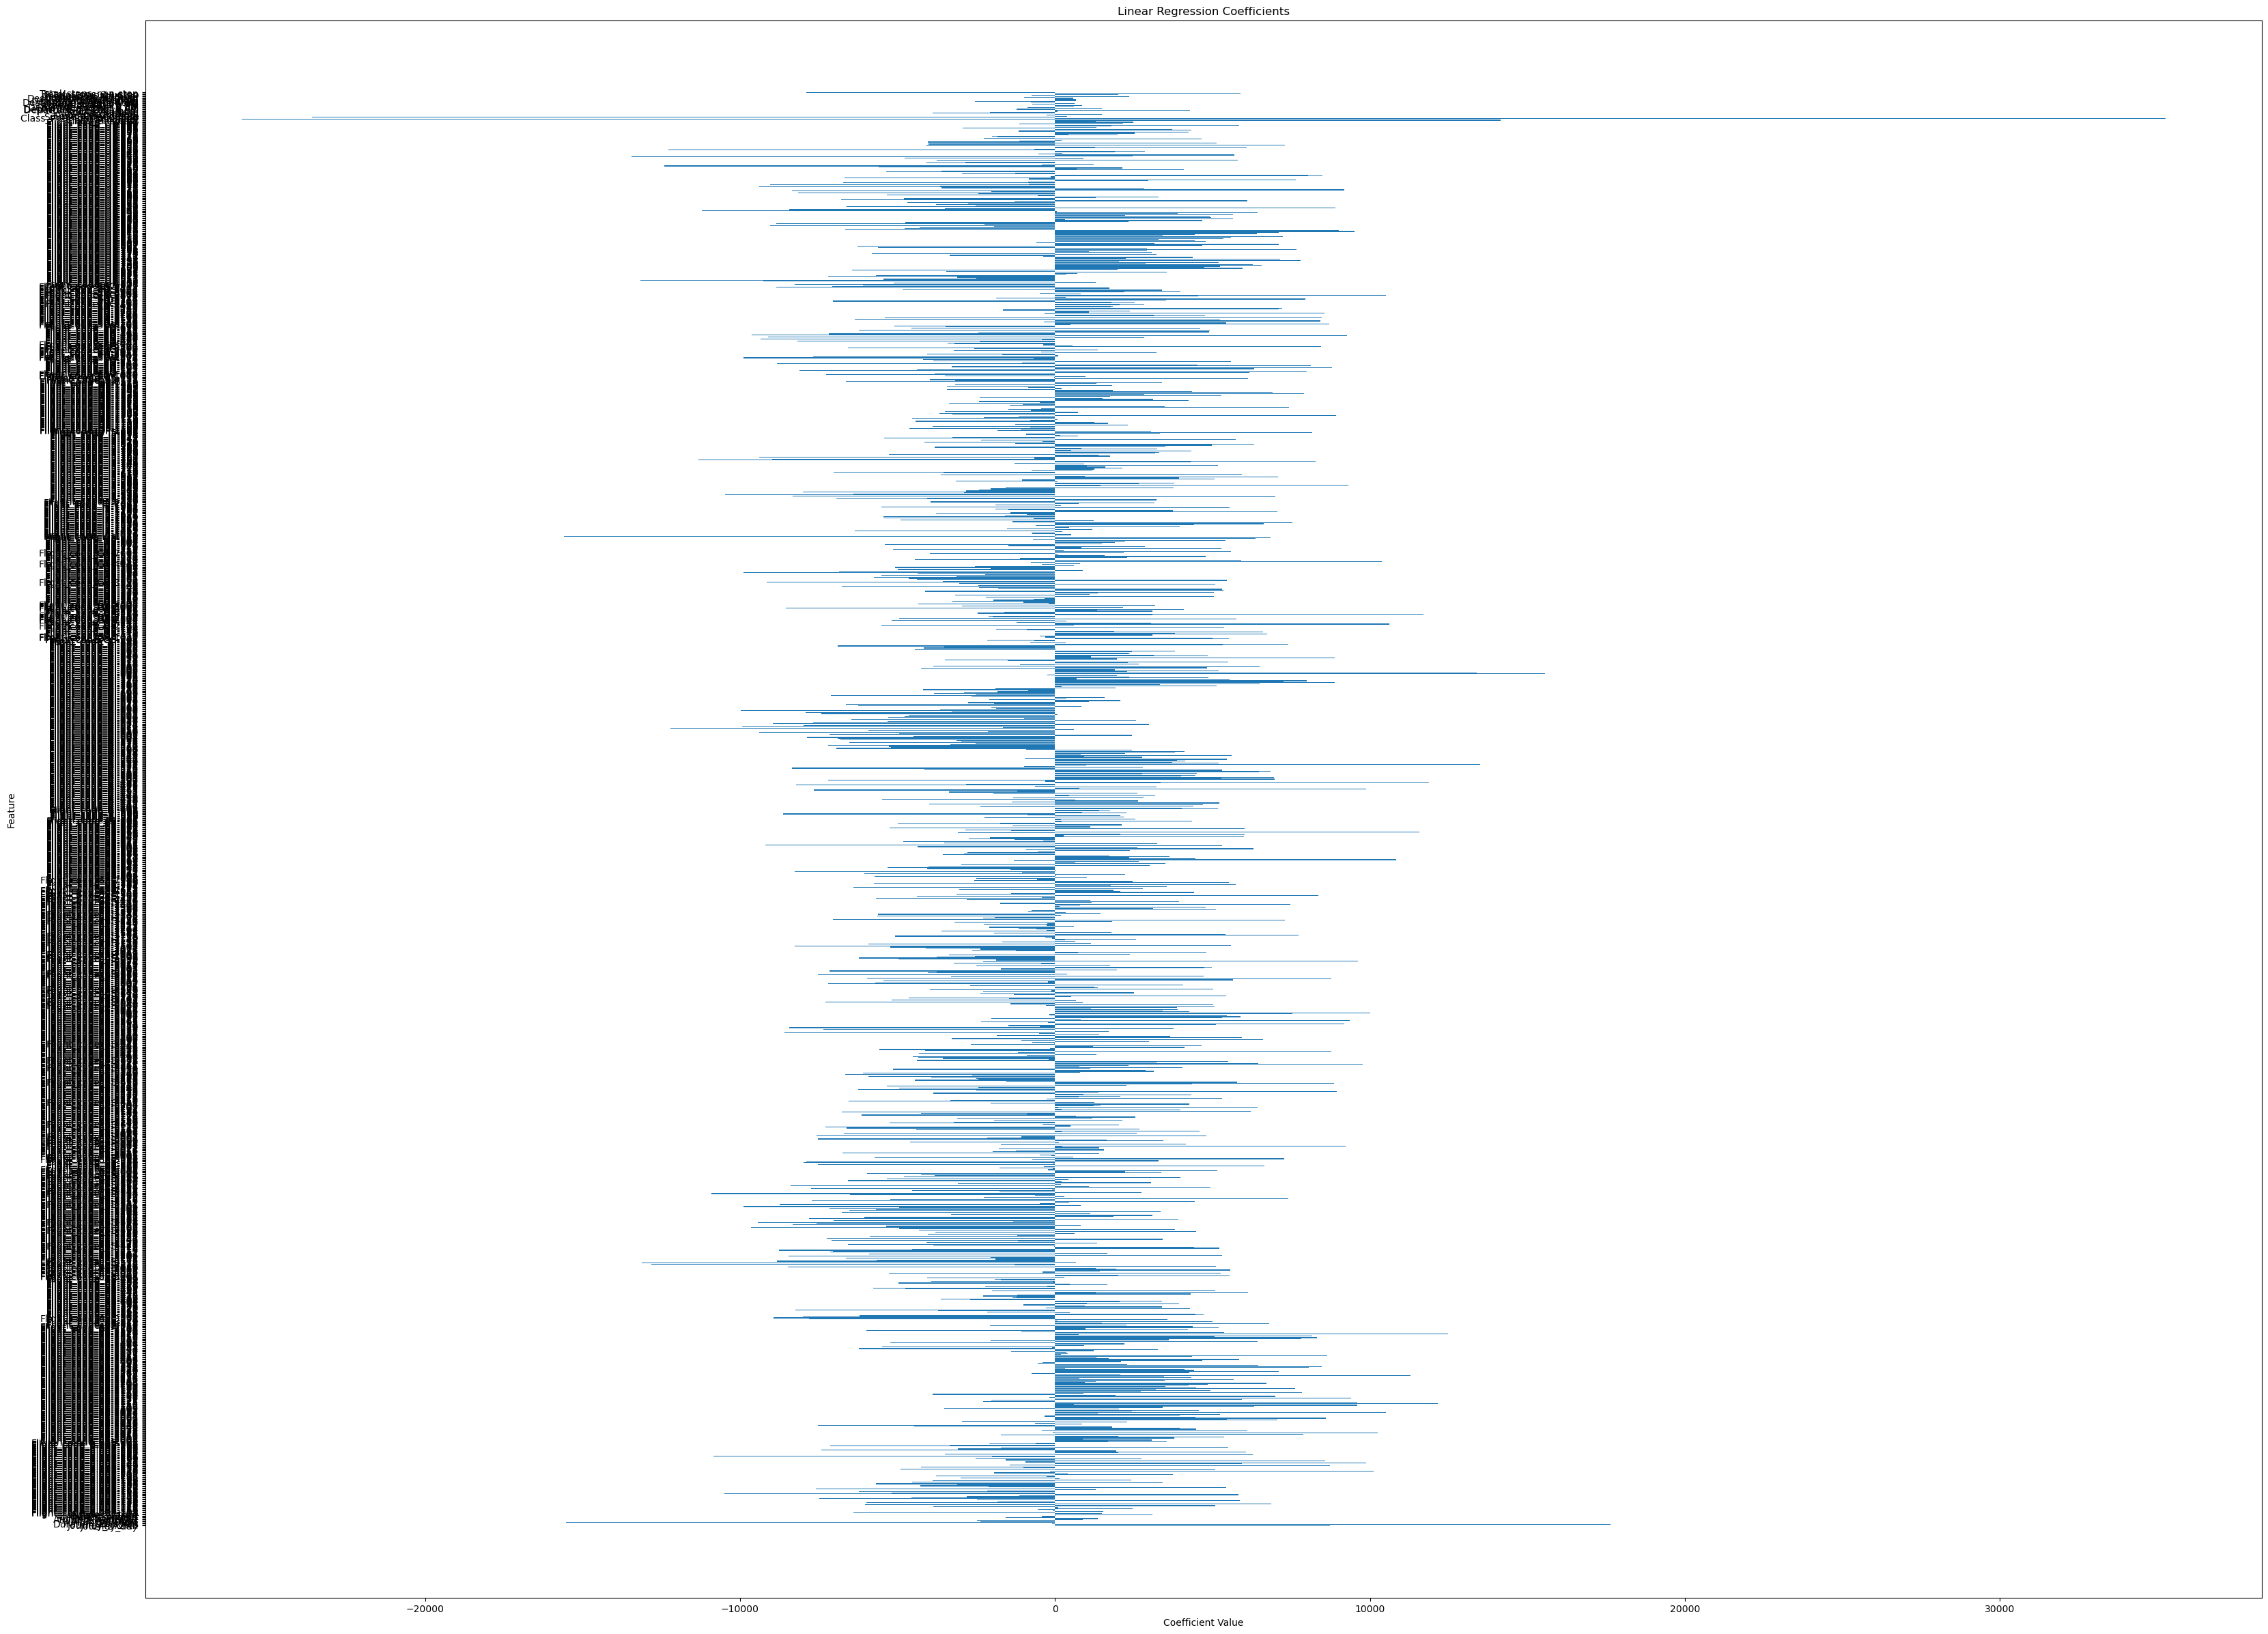

In [21]:
# Extract coefficients and corresponding feature names
coefficients = model.named_steps['regressor'].coef_
feature_names = model.named_steps['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(input_features=categorical_features)

# Concatenate numerical and categorical feature names
all_feature_names = np.concatenate([numerical_features, feature_names])

# Plot coefficients
plt.figure(figsize=(40, 30))
plt.barh(all_feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Linear Regression Coefficients")
plt.show()


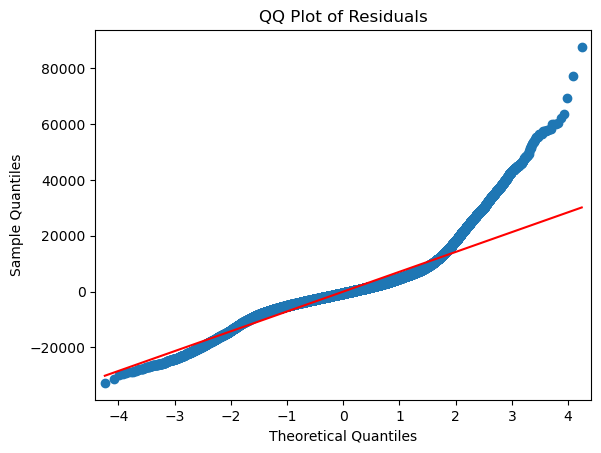

In [19]:
import statsmodels.api as sm

# QQ plot
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.show()
